# Isomap

- Tries to minimise the global error by looking at all of the pairwise distances and computing global geodesics.
It is a variant of the standard multi-dimensional scaling (MDS) algorithm.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

In [2]:
n_points = 2000
X, color = datasets.samples_generator.make_swiss_roll(n_points,0.01, random_state=0)

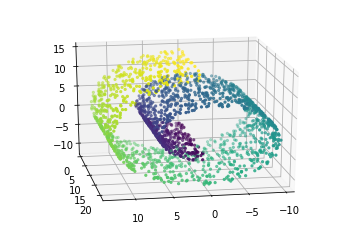

In [3]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color,marker='.')
ax.view_init(20, 80)
plt.show()

## The Isomap Algorithm


In [4]:
from sklearn.neighbors import NearestNeighbors, kneighbors_graph
from sklearn.utils.graph import graph_shortest_path
K = 10
nbrs_ = NearestNeighbors()
nbrs_.fit(X)
kng = kneighbors_graph(nbrs_, K, mode='distance')

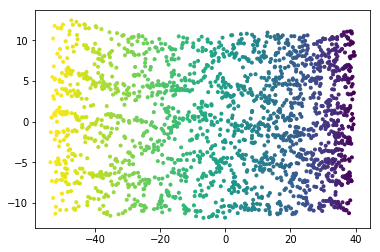

In [5]:
kng = kneighbors_graph(nbrs_, K, mode='distance')

dist_matrix_ = graph_shortest_path(kng)
dist_matrix_.shape
ndata = np.shape(X)[0]
G = dist_matrix_ ** 2

J = np.eye(ndata) - np.ones((ndata, ndata))/ndata
B = -J.dot(G).dot(J.T)/2

evals, evecs = np.linalg.eigh(B)
#evals = np.real(evals)
# Sort by eigenvalue in descending order                                                  
idx   = np.argsort(evals)[::-1]
evals = evals[idx]
evecs = evecs[:,idx]

import warnings
warnings.filterwarnings('ignore')

V  = np.diag(np.absolute(np.sqrt(evals)))
P  = evecs
Y  = P.dot(V)

IS2 = Y[:,0:2]
plt.scatter(IS2[:, 0], IS2[:, 1], c=color, marker='.')
plt.show()

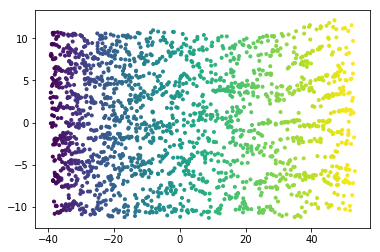

In [6]:
from sklearn import manifold
n = manifold.Isomap(K, 2).fit_transform(X)
plt.scatter(n[:, 0], n[:, 1], c=color, marker='.')
plt.show()

In [7]:
def subplot_raw(data, names=None):
    fig, axs = plt.subplots(1, len(data), figsize=(13, 3))

    for a, d in zip(range(0,len(data)), data):
        axs[a].scatter(d[:, 0], d[:, 1], c=color, marker='.')
        if names:
            axs[a].set_title(names[a])
     

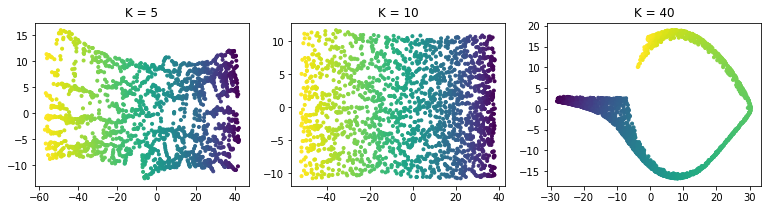

In [8]:
iso1 = manifold.Isomap(5,2).fit_transform(X)

iso2 = manifold.Isomap(20,2).fit_transform(X)

iso3 = manifold.Isomap(40,2).fit_transform(X)

new_data = [iso1, iso2, iso3]
names = ['K = 5', 'K = 10', 'K = 40']
subplot_raw(new_data, names)

## Real Dataset

In [16]:
def subplot_rawl(data, names=None):
    labels = iris.target
    fig, axs = plt.subplots(1, len(data), figsize=(13, 3))
    colors = ['#3ebc00', 'indigo', '#fff400']

    for a, d in zip(range(0,len(data)), data):
        for i, c, label in zip(target_ids, colors,iris.target_names):
            axs[a].scatter(d[i == labels, 0], d[i == labels, 1], c = c, edgecolors='black', s=135,label=label, marker='.')
        if names:
            axs[a].set_title(names[a])

IndexError: boolean index did not match indexed array along dimension 0; dimension is 2000 but corresponding boolean dimension is 150

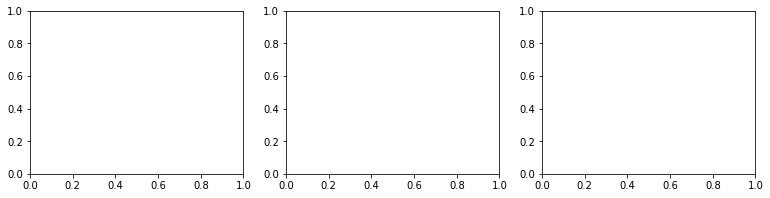

In [17]:
iris = datasets.load_iris()
y = iris.target
target_ids = np.unique(iris.target)

iso1 = manifold.Isomap(4,2).fit_transform(X)

iso2 = manifold.Isomap(25,2).fit_transform(X)

iso3 = manifold.Isomap(40,2).fit_transform(X)

new_data2 = [iso1, iso2, iso3]
names = ['K = 4', 'K = 25', 'K = 40']
subplot_rawl(new_data2, names)